# Trabalho 2 - Privacidade de Dados - Kelvin Sampaio

In [1]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importando dataset
df = pd.read_csv('covid.csv', sep=';').drop(['Unnamed: 0'], axis=1)

In [3]:
df.head()

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo
3,9683fc5fd2c0f7b72fa92ffd259d738a,230440.0,FORTALEZA,CE,MASCULINO,1992-03-12,Negativo
4,e257ccdc48289f02e047cbf046251319,230370.0,CAUCAIA,CE,MASCULINO,1970-03-06,Negativo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879543 entries, 0 to 879542
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Identificador    879543 non-null  object 
 1   CodigoMunicipio  879543 non-null  float64
 2   Municipio        879543 non-null  object 
 3   Estado           879543 non-null  object 
 4   Genero           879543 non-null  object 
 5   Nascimento       879543 non-null  object 
 6   ResultadoExame   879543 non-null  object 
dtypes: float64(1), object(6)
memory usage: 47.0+ MB


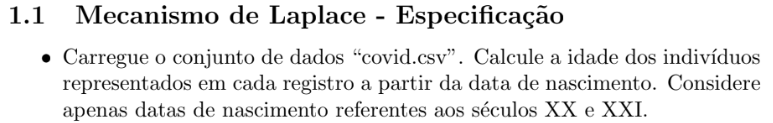

In [5]:
#Convertendo coluna Nascimento para o tipo Date
df['Nascimento'] = pd.to_datetime(df['Nascimento'], format='%Y-%m-%d', errors='coerce')

#Criando um novo DF com a coluna idade e os dados convertidos
df1 = df.loc[df['Nascimento'].dt.year >= 1900]
df1['Idade'] = (datetime.now().year - df1['Nascimento'].dt.year)

In [6]:
df1.head()

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame,Idade
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo,19
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo,39
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo,40
3,9683fc5fd2c0f7b72fa92ffd259d738a,230440.0,FORTALEZA,CE,MASCULINO,1992-03-12,Negativo,30
4,e257ccdc48289f02e047cbf046251319,230370.0,CAUCAIA,CE,MASCULINO,1970-03-06,Negativo,52


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879490 entries, 0 to 879542
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Identificador    879490 non-null  object        
 1   CodigoMunicipio  879490 non-null  float64       
 2   Municipio        879490 non-null  object        
 3   Estado           879490 non-null  object        
 4   Genero           879490 non-null  object        
 5   Nascimento       879490 non-null  datetime64[ns]
 6   ResultadoExame   879490 non-null  object        
 7   Idade            879490 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 60.4+ MB


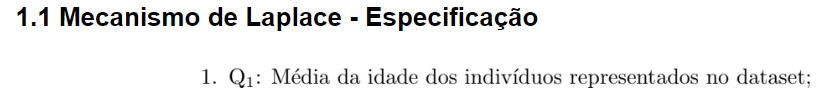

In [8]:
#Calcula a média das idades
f_x = df1['Idade'].mean()
f_x

41.68734380152134

In [9]:
#Sensibilidade Global
sensitivity = 1 

#Epsilons
epsilons = [0.1, 0.5, 1.0, 10.0]

In [10]:
#Possível Calculo de Sensibilidade Global
'''f_x_linha = (df1['Idade'].sum() - df1['Idade']) / (df.shape[0] - 1)
f_x = df1['Idade'].mean()
sensitivity = abs(f_x - f_x_linha.min()) 
'''


"f_x_linha = (df1['Idade'].sum() - df1['Idade']) / (df.shape[0] - 1)\nf_x = df1['Idade'].mean()\nsensitivity = abs(f_x - f_x_linha.min()) \n"

In [11]:
#Laplace
ruidos = list()
for epsilon in epsilons:
    ruido = np.random.laplace(loc=0, scale=sensitivity/epsilon)
    ruidos.append(ruido)
    
    print(f'para e={epsilon} o ruido={ruido:.2f}')

para e=0.1 o ruido=5.11
para e=0.5 o ruido=-4.00
para e=1.0 o ruido=-1.66
para e=10.0 o ruido=-0.05


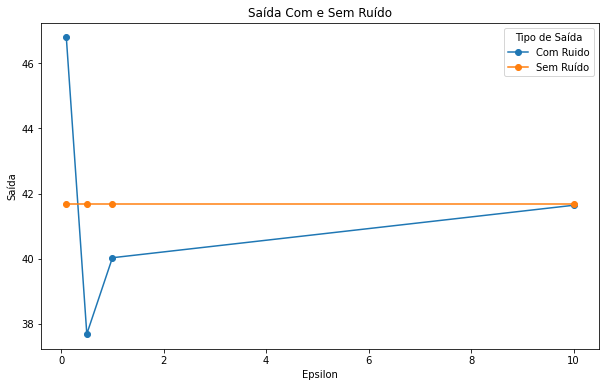

In [12]:
#Plot de Gráficos comparativos Original x Laplace

#Valores Epsilons
labels = [f'{epsilon}' for epsilon in epsilons]

#Original
original = [round(f_x, 2) for i in range(4)]

#Adicionando ruido
laplace = [round(f_x + ruido, 2) for ruido in ruidos]

plt.figure(figsize=(10,6))

labe = f'Com Ruido'
plt.plot(epsilons, laplace, '-o', label=labe)

labe1 = f'Sem Ruído'
plt.plot(epsilons, original, '-o', label=labe1)

plt.title(f'Saída Com e Sem Ruído')
plt.legend(title='Tipo de Saída')
plt.xlabel('Epsilon')
plt.ylabel('Saída')

plt.show()

In [13]:
#Mescla variaveis 
dados = list(zip(laplace, labels))

#Cria de dataframe
df_Q1 = pd.DataFrame(dados, columns=['Média_Idade','Valor_Epsilon'])

In [14]:
#Salva datraframe em arquivo csv
df_Q1.to_csv('Consulta_1_1Q1.csv', index=False)
df_Q1.head()

,Média_Idade,Valor_Epsilon
0,46.79,0.1
1,37.69,0.5
2,40.03,1.0
3,41.64,10.0


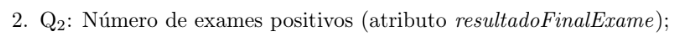

In [15]:
#Quantidade de exames positivos
f_x = df1.loc[df1['ResultadoExame'] == 'Positivo'].shape[0]
f_x

265915

In [16]:
#Sensibilidade Global
sensitivity = 1 

#Epsilons
epsilons = [0.1, 0.5, 1.0, 10.0]

In [17]:
#Laplace
ruidos = list()
for epsilon in epsilons:
    ruido = np.random.laplace(loc=0, scale=sensitivity/epsilon)
    ruidos.append(ruido)
    
    print(f'para e={epsilon} o ruido={ruido:.2f}')

para e=0.1 o ruido=-18.38
para e=0.5 o ruido=-2.83
para e=1.0 o ruido=-1.78
para e=10.0 o ruido=0.04


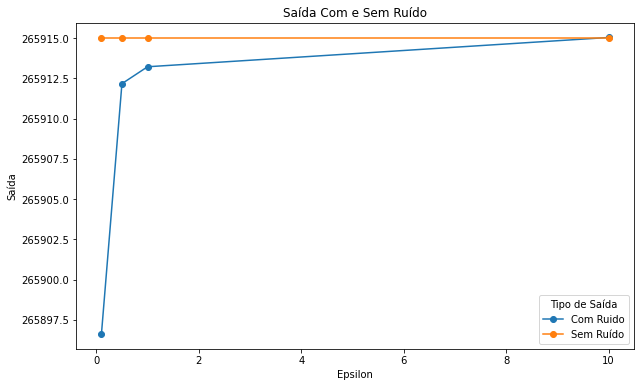

In [18]:
#Plot de Gráficos comparativos Original x Laplace 

#Valores Epsilons
labels = [f'{epsilon}' for epsilon in epsilons]

#Original
original = [round(f_x, 2) for i in range(4)]

#Adicionando ruido
laplace = [round(f_x + ruido, 2) for ruido in ruidos]

plt.figure(figsize=(10,6))

labe = f'Com Ruido'
plt.plot(epsilons, laplace, '-o', label=labe)
labe1 = f'Sem Ruído'
plt.plot(epsilons, original, '-o', label=labe1)

plt.title(f'Saída Com e Sem Ruído')
plt.legend(title='Tipo de Saída')
plt.xlabel('Epsilon')
plt.ylabel('Saída')

plt.show()

In [19]:
#Mescla variaveis 
dados = list(zip(laplace, labels))

#Cria de dataframe
df_Q2 = pd.DataFrame(dados, columns=['Exames_Positivos','Valor_Epsilon'])

In [20]:
#Salva datraframe em arquivo csv
df_Q2.to_csv('Consulta_1_1Q2.csv', index=False)
df_Q2.head()

,Exames_Positivos,Valor_Epsilon
0,265896.62,0.1
1,265912.17,0.5
2,265913.22,1.0
3,265915.04,10.0


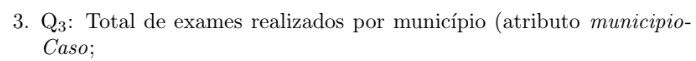

In [21]:
#Importando o dataset com mesoregiões
df2 = pd.read_csv('dadoscovid.csv', sep=',')

In [22]:
df2.head()

,identificador,genero,nascimento,idade,resultadoExame,municipio,codigoMunicipio,mesoregiao
0,86343365d3538dad3d93736b78c986ab,MASCULINO,1978-04-20,44,Negativo,ABAIARA,230010,Sul Cearense
1,a1c274cc7c0bc943e2806148274f196d,MASCULINO,1990-05-20,32,Negativo,ABAIARA,230010,Sul Cearense
2,7c08d488bb6562bdc29861ede553e6b0,MASCULINO,1997-12-20,24,Positivo,ABAIARA,230010,Sul Cearense
3,6ce4fe9d51af40f15d20dc37491ee742,FEMININO,1995-02-20,27,Positivo,ABAIARA,230010,Sul Cearense
4,9276dfcc14fbe679a6ecc093d8e00b71,MASCULINO,1991-07-20,31,Positivo,ABAIARA,230010,Sul Cearense


In [23]:
#Agrupando mesoregião com exames realizados
df2 = df2.groupby('mesoregiao')['resultadoExame'].count()
df2

mesoregiao
Centro-Sul Cearense            1871
Jaguaribe                      2099
Metropolitana de Fortaleza    10626
Noroeste Cearense              6054
Norte Cearense                 2922
Sertões Cearenses              3337
Sul Cearense                   4484
Name: resultadoExame, dtype: int64

In [24]:
#Inseri os valores de epsilon
epsilon0 = 0.1
epsilon1 = 0.5
epsilon2 = 1.0
epsilon3 = 10

In [25]:
#listas criadas para salvar os dados gerados
epsilonn = [epsilon0, epsilon1, epsilon2, epsilon3]
epsilon_01 = []
epsilon_05 = []
epsilon_1 = []
epsilon_10 = []
resultado = []
count = 0
meso = []

In [26]:
#Adiciona ruído e salva em listas 
for i in range(len(df2)):
    print(df2.index[i])
    print("\nOriginal: ", df2[i])
    meso = df2.index
    for j in range(len(epsilonn)):
        resultado.append(df2[i] + np.random.laplace(loc=0, scale=sensitivity/epsilonn[j]))
        print('EP = ', epsilonn[j], ': ', resultado[count])
        
        if (epsilonn[j] == 0.1):
            epsilon_01.append(resultado[count])
        elif (epsilonn[j] == 0.5):
            epsilon_05.append(resultado[count])
        elif (epsilonn[j] == 1.0):
            epsilon_1.append(resultado[count])
        elif (epsilonn[j] == 10):
            epsilon_10.append(resultado[count])
        
        count += 1
        
    dados = list(zip(meso, epsilon_01, epsilon_05, epsilon_1, epsilon_10))
    print('\n--------------------------------')

Centro-Sul Cearense

Original:  1871
EP =  0.1 :  1871.3292918321565
EP =  0.5 :  1871.560581537561
EP =  1.0 :  1869.3734566297555
EP =  10 :  1871.0187041870947

--------------------------------
Jaguaribe

Original:  2099
EP =  0.1 :  2092.86580640948
EP =  0.5 :  2100.3880463595874
EP =  1.0 :  2098.4594923128184
EP =  10 :  2098.96840251913

--------------------------------
Metropolitana de Fortaleza

Original:  10626
EP =  0.1 :  10619.56132248547
EP =  0.5 :  10625.739279619505
EP =  1.0 :  10623.053032901738
EP =  10 :  10625.933864298524

--------------------------------
Noroeste Cearense

Original:  6054
EP =  0.1 :  6030.131839892157
EP =  0.5 :  6054.020280183822
EP =  1.0 :  6055.626872982725
EP =  10 :  6054.075742838848

--------------------------------
Norte Cearense

Original:  2922
EP =  0.1 :  2919.8407040680995
EP =  0.5 :  2921.4436647759935
EP =  1.0 :  2922.137103005405
EP =  10 :  2922.0259249395417

--------------------------------
Sertões Cearenses

Original:  

In [27]:
#Salvando os dados em um novo DF
df_meso = pd.DataFrame(dados, columns=['Mesoregião','EP = 0.1','EP = 0.5', 'EP = 1.0', 'EP = 10.0'])

#Salva datraframe em arquivo csv
df_meso.to_csv('Consulta_1_1Q3.csv', index=False)
df_meso

,Mesoregião,EP = 0.1,EP = 0.5,EP = 1.0,EP = 10.0
0,Centro-Sul Cearense,1871.329292,1871.560582,1869.373457,1871.018704
1,Jaguaribe,2092.865806,2100.388046,2098.459492,2098.968403
2,Metropolitana de Fortaleza,10619.561322,10625.739280,10623.053033,10625.933864
3,Noroeste Cearense,6030.131840,6054.020280,6055.626873,6054.075743
4,Norte Cearense,2919.840704,2921.443665,2922.137103,2922.025925
5,Sertões Cearenses,3321.326431,3336.071325,3335.916453,3336.913740
6,Sul Cearense,4477.100428,4483.113565,4485.201252,4483.868011


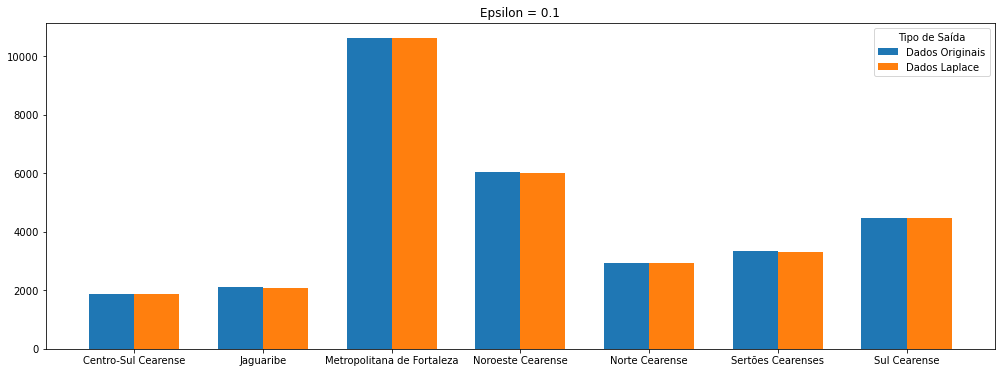

In [28]:
#Plotagem Epsilon = 0.1
labels = [df2.index[i] for i in range(7)]
original = [round(df2[i], 2) for i in range(7)]
laplace = epsilon_01

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(17,6))
plt.bar(x - width / 2, original, width, label='Dados Originais')
plt.bar(x + width / 2, laplace, width, label='Dados Laplace')

plt.xticks(x, labels)
plt.title(f'Epsilon = 0.1')
plt.legend(title= 'Tipo de Saída')
plt.show()

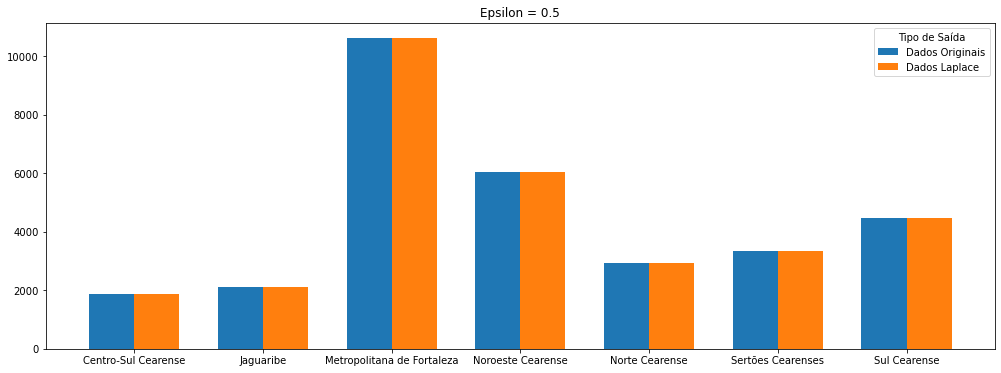

In [29]:
#Plotagem Epsilon = 0.5
labels = [df2.index[i] for i in range(7)]
original = [round(df2[i], 2) for i in range(7)]
laplace = epsilon_05

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(17,6))
plt.bar(x - width / 2, original, width, label='Dados Originais')
plt.bar(x + width / 2, laplace, width, label='Dados Laplace')

plt.xticks(x, labels)
plt.title(f'Epsilon = 0.5')
plt.legend(title= 'Tipo de Saída')
plt.show()

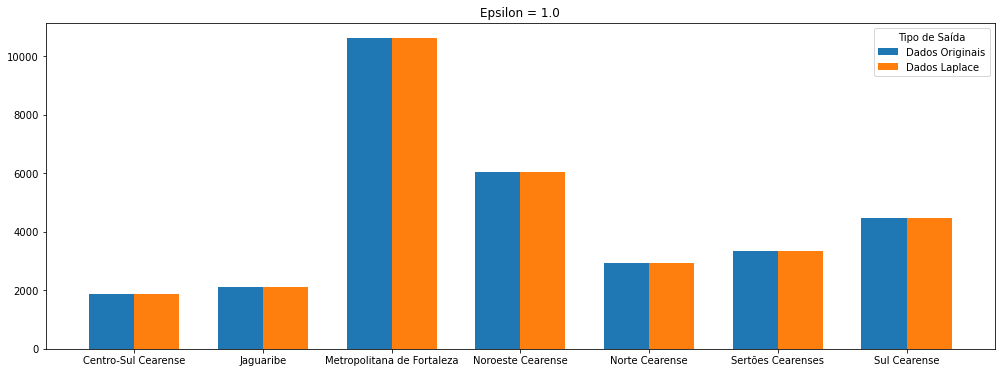

In [30]:
#Plotagem Epsilon = 1.0
labels = [df2.index[i] for i in range(7)]
original = [round(df2[i], 2) for i in range(7)]
laplace = epsilon_1

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(17,6))
plt.bar(x - width / 2, original, width, label='Dados Originais')
plt.bar(x + width / 2, laplace, width, label='Dados Laplace')

plt.xticks(x, labels)
plt.title(f'Epsilon = 1.0')
plt.legend(title= 'Tipo de Saída')
plt.show()

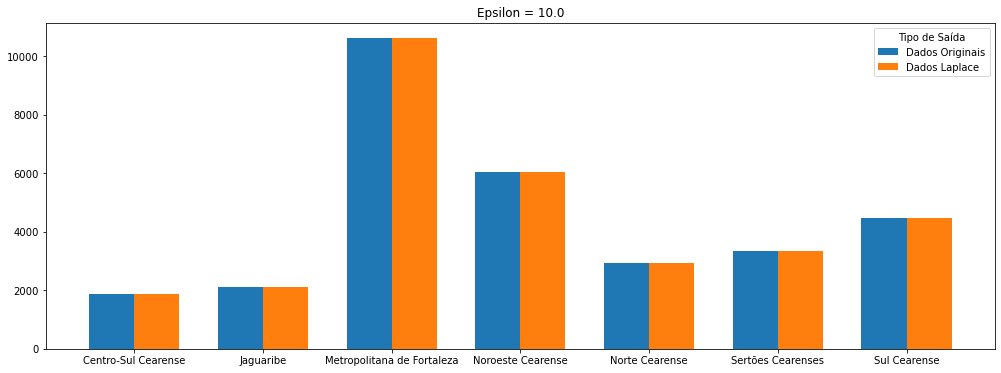

In [31]:
#Plotagem Epsilon = 10.0
labels = [df2.index[i] for i in range(7)]
original = [round(df2[i], 2) for i in range(7)]
laplace = epsilon_10

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(17,6))
plt.bar(x - width / 2, original, width, label='Dados Originais')
plt.bar(x + width / 2, laplace, width, label='Dados Laplace')

plt.xticks(x, labels)
plt.title(f'Epsilon = 10.0')
plt.legend(title= 'Tipo de Saída')
plt.show()

# 1.2 Mecanismo Exponencial - Especificação


In [32]:
# Função Score
def u(data, option):
    return data.value_counts()[option] / data.shape[0]

In [33]:
# Função exponencial 
def exponential(df1, options, u, sensitivity, epsilon):
    # calcula a função de utilidade (score) de cada elemento em opções
    scores = [u(df1, option) for option in options]
    
    # Calcula a probabilidade de cada elemento baseado no seu score
    probabilities = [np.exp(epsilon * score / (2 * sensitivity)) for score in scores]
    
    # Normaliza as probabilidades pra somar 1
    probabilities = probabilities / np.linalg.norm(probabilities, ord=1)

    # escolhe um elemento de opções baseado na sua probabilidade
    return np.random.choice(options, 1, p=probabilities)[0]

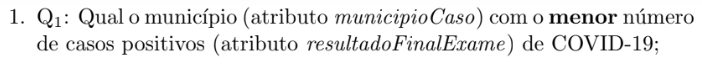

In [34]:
#Municipio com menor número de casos positivos
df1.query('ResultadoExame == "Positivo"').groupby('Municipio')['ResultadoExame'].value_counts().sort_values(ascending = True) 

Municipio          ResultadoExame
TARRAFAS           Positivo             50
PENAFORTE          Positivo             58
ARNEIROZ           Positivo             59
ANTONINA DO NORTE  Positivo             64
AIUABA             Positivo             71
                                     ...  
MARACANAU          Positivo           7273
CRATO              Positivo           8488
SOBRAL             Positivo           9990
JUAZEIRO DO NORTE  Positivo          12298
FORTALEZA          Positivo          52558
Name: ResultadoExame, Length: 184, dtype: int64

In [35]:
#Criando novo df com base nos resultados positivos
options = df1['Municipio'].unique()
def func_utilidade(data, option):
    return data.query('ResultadoExame == "Positivo"').value_counts(['Municipio'])[option] / data.shape[0]

In [36]:
#epsilons
epsilons = [0.1, 0.5, 1.0, 10.0] 
 
# sensibilidade
sensitivity = 1 

In [37]:
#Mecanismo Exponencial 
all_e_results = {}

for i in epsilons:
    result = []
    for j in range(10):
        result.append(exponential(df1, options, func_utilidade, sensitivity, i))
    all_e_results[str(i)] = result

In [38]:
#Salvando os dados em um novo DF
df3 = pd.DataFrame(all_e_results)

In [39]:
#Salva datraframe em arquivo csv
df3.to_csv('Consulta_1_2Q1.csv', index=False)
df3.head(25)

,0.1,0.5,1.0,10.0
0,HIDROLANDIA,FORTALEZA,UMARI,ITATIRA
1,CATARINA,ALCANTARAS,CAPISTRANO,CARNAUBAL
2,MILAGRES,SENADOR SA,ACARAU,ACOPIARA
3,UMARI,APUIARES,SANTA QUITERIA,UBAJARA
4,BAIXIO,MILHA,BANABUIU,GUARACIABA DO NORTE
5,PEDRA BRANCA,ARNEIROZ,PALHANO,CAUCAIA
6,SAO JOAO DO JAGUARIBE,SAO BENEDITO,SANTA QUITERIA,JUAZEIRO DO NORTE
7,MARANGUAPE,CRUZ,IRAUCUBA,ANTONINA DO NORTE
8,ALTANEIRA,CAMOCIM,AMONTADA,VARZEA ALEGRE
9,TARRAFAS,JUAZEIRO DO NORTE,MUCAMBO,CARIDADE


Histograma Para Epsilon: 0.1


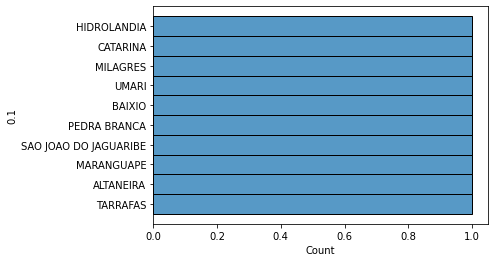

Histograma Para Epsilon: 0.5


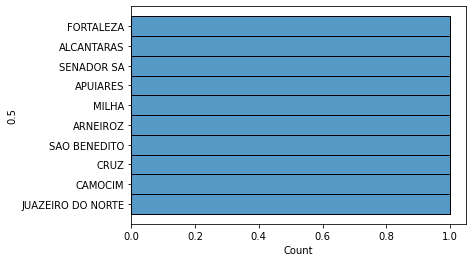

Histograma Para Epsilon: 1.0


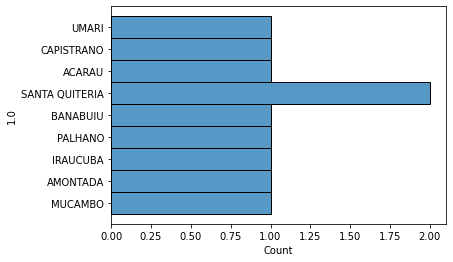

Histograma Para Epsilon: 10.0


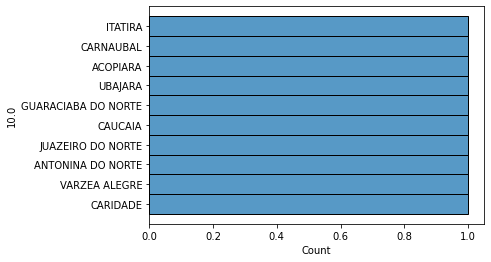

In [40]:
#Plot Histograma
for i in epsilons:
    print(f'Histograma Para Epsilon: {i}')
    sns.histplot(data=df3, y=str(i))
    plt.show() 

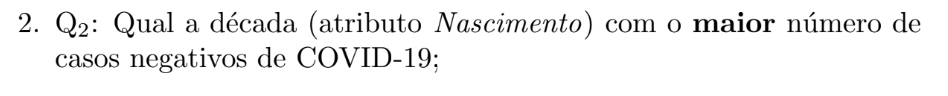

In [41]:
#Calculo de decada
df1['Decada'] = (df1['Nascimento'].dt.year - ((df1['Nascimento'].dt.year % 10) % 100 / 10) * 10)
df1['Decada'] = df1['Decada'].astype(int)
df1

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame,Idade,Decada
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo,19,2000
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo,39,1980
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo,40,1980
3,9683fc5fd2c0f7b72fa92ffd259d738a,230440.0,FORTALEZA,CE,MASCULINO,1992-03-12,Negativo,30,1990
4,e257ccdc48289f02e047cbf046251319,230370.0,CAUCAIA,CE,MASCULINO,1970-03-06,Negativo,52,1970
...,...,...,...,...,...,...,...,...,...
879538,034184a3bba5a9d9020c6f78287cfb30,230440.0,FORTALEZA,CE,FEMININO,1982-12-08,Positivo,40,1980
879539,7f4c28d219dd03de2457b16de64563a0,230440.0,FORTALEZA,CE,FEMININO,1980-12-02,Negativo,42,1980
879540,4f8257be1fefe7e9a3b17f08247792c6,230440.0,FORTALEZA,CE,FEMININO,1988-05-17,Provável,34,1980
879541,2b610df8ede251af2e17a6ac07726678,230410.0,CRATEUS,CE,FEMININO,1970-09-28,Negativo,52,1970


In [42]:
#Coletando somente os resultados Negativos de cada decada
df1.query('ResultadoExame == "Negativo"').groupby('Decada')['ResultadoExame'].value_counts().sort_values(ascending = False)

Decada  ResultadoExame
1980    Negativo          126187
1990    Negativo          119330
1970    Negativo           92051
1960    Negativo           63206
2000    Negativo           45497
1950    Negativo           35324
2010    Negativo           25935
1940    Negativo           19710
1930    Negativo           10010
1920    Negativo            2427
2020    Negativo            2362
1910    Negativo             163
1900    Negativo               4
Name: ResultadoExame, dtype: int64

In [43]:
#Removendo os itens repetidos
options = df1['Decada'].unique()

def func_utilidade(data, option):
    return data.query('ResultadoExame == "Negativo"').value_counts(['Decada'])[option] / data.shape[0]

#epsilons
epsilons = [0.1, 0.5, 1.0, 10.0] 

# sensibilidade
sensitivity = 1 

In [44]:
#Mecanismo Exponencial
all_e_results = {}

for i in epsilons:
    result = []
    for j in range(10):
        result.append(exponential(df1, options, func_utilidade, sensitivity, i))
    all_e_results[str(i)] = result


In [45]:
#Salvando os dados em um novo DF
df4 = pd.DataFrame(all_e_results)

In [46]:
#Salva datraframe em arquivo csv
df4.to_csv('Consulta_1_2Q2.csv', index=False)
df4.head(50)

,0.1,0.5,1.0,10.0
0,2010,1910,1940,1930
1,1990,1980,1970,1940
2,1940,1920,2010,1940
3,1960,1900,1990,1960
4,1930,1980,1990,1990
5,1960,1980,1910,1920
6,1920,1960,2020,2010
7,1920,1910,1970,1900
8,1960,1950,1910,1930
9,2000,1980,1950,1920


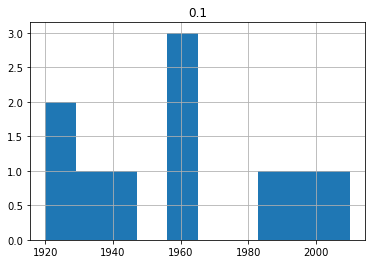

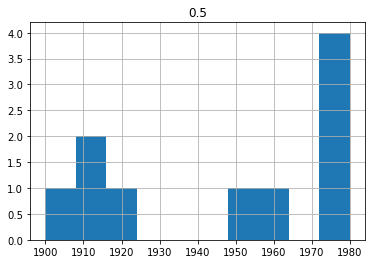

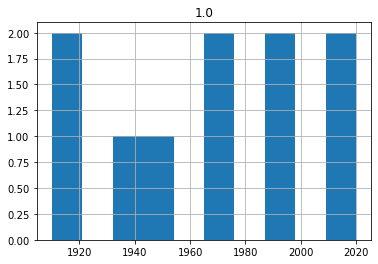

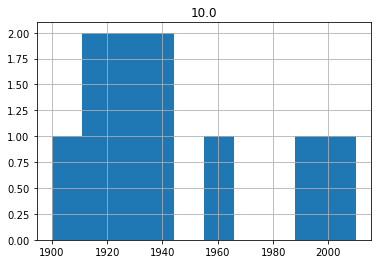

In [53]:
#plot histograma para Epsilon
for i in epsilons: 
    df4.hist(column = str(i), bins = 10)